In [14]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

from collections import Counter

In [15]:
df1 = pd.read_csv('Churn1.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 20 columns):
c_AreaCode               4617 non-null int64
c_InternationalPlan      4617 non-null int64
c_State                  4617 non-null object
c_VMailPlan              4617 non-null int64
q_AccountLength          4617 non-null int64
q_CustServCalls          4617 non-null int64
q_DayCalls               4617 non-null int64
q_DayCharge              4617 non-null float64
q_DayMins                4617 non-null float64
q_EveCalls               4617 non-null int64
q_EveCharge              4617 non-null float64
q_EveMins                4617 non-null float64
q_InternationalCharge    4617 non-null float64
q_InternationalMins      4617 non-null float64
q_Internationalcalls     4617 non-null int64
q_NightCalls             4617 non-null int64
q_NightCharge            4617 non-null float64
q_NightMins              4617 non-null float64
q_VMailMessage           4617 non-null int64
y_Churn              

In [16]:
# Setting the lists
Day_Data = ['q_DayMins','q_DayCalls','q_DayCharge']
Eve_Data = ['q_EveMins','q_EveCalls','q_EveCharge']
Nig_Data = ['q_NightMins','q_NightCalls','q_NightCharge']
Int_Data = ['q_InternationalMins','q_Internationalcalls','q_InternationalCharge']
ALL = ['q_DayMins','q_DayCalls','q_DayCharge','q_EveMins','q_EveCalls','q_EveCharge','q_NightMins','q_NightCalls','q_NightCharge','q_InternationalMins','q_Internationalcalls','q_InternationalCharge']

In [33]:
# C_Phone was already dropped before as it like an Id data

## Full Correlation matrix

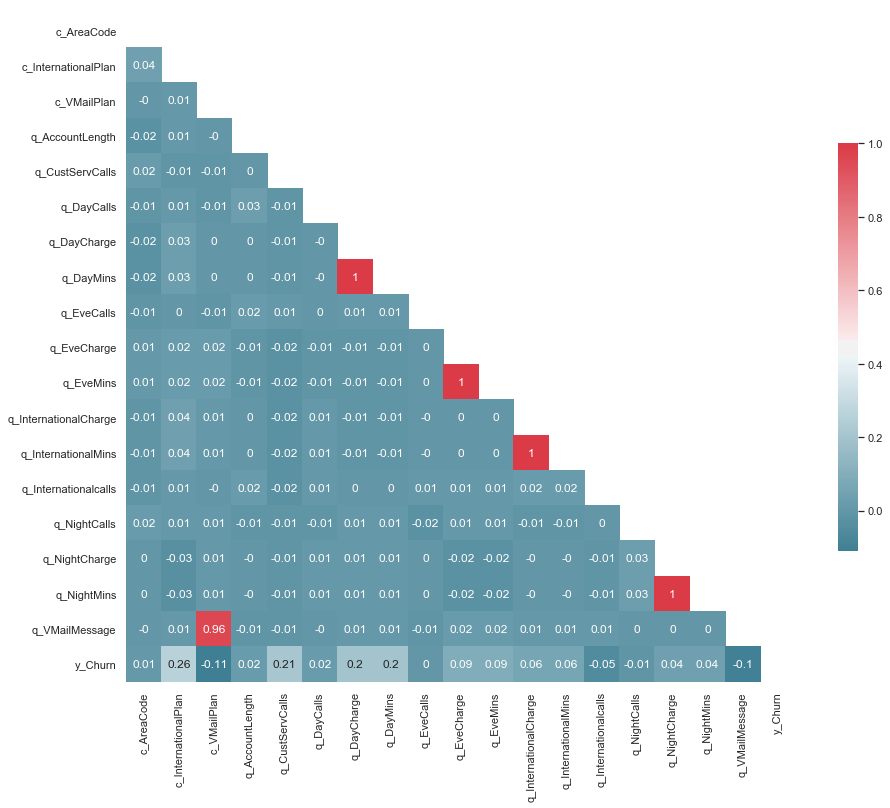

In [17]:
# Run Correlation
Corr_All= df1.corr().round(2)

# Masking of upper traingle
sns.set(style="white")
mask = np.zeros_like(Corr_All, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plotting
rcParams['figure.figsize'] = 15,15
sns.heatmap(Corr_All,annot = True,mask=mask,cmap = sns.diverging_palette(220, 10, as_cmap=True),square=True,cbar_kws={"shrink": .5})

# The Figure shows a corr coeff of 1 between minutes and charges.. hence we choose to drop all the Charge coulumns before PrePROCESSING stage.
#Also column VmailMessage highly corelates with VmailPlan 


### Checking if- Do we need all the minutes and calls columns?

In [18]:
# Add new created variables
df1['q_TotalMins'] = df1.q_DayMins + df1.q_EveMins + df1.q_NightMins + df1.q_InternationalMins
df1['q_TotalCalls'] = df1.q_DayCalls + df1.q_EveCalls + df1.q_NightCalls + df1.q_Internationalcalls


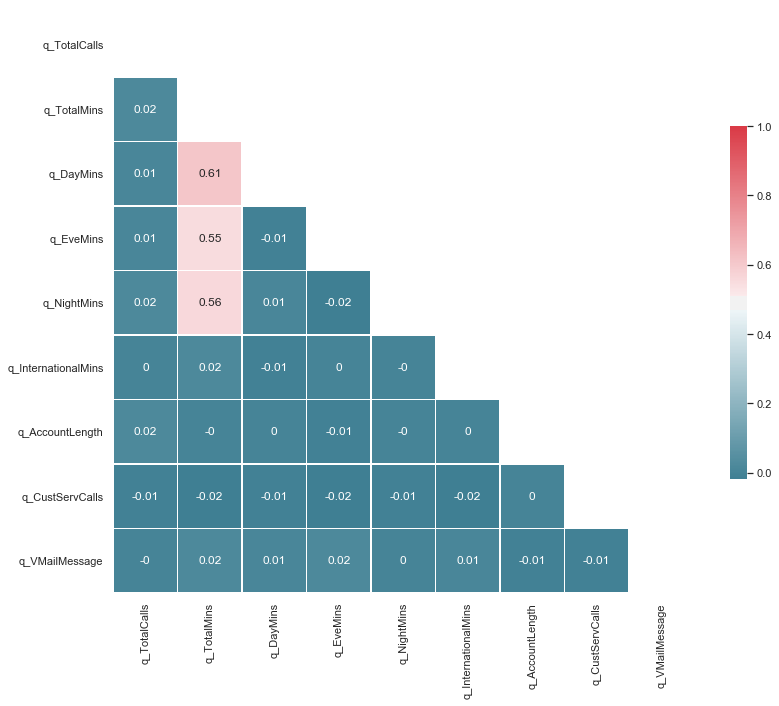

In [19]:
# Set Columns List
Agg_Data = ['q_TotalCalls','q_TotalMins','q_DayMins','q_EveMins','q_NightMins','q_InternationalMins','q_AccountLength','q_CustServCalls','q_VMailMessage']

# Correlation
corr_matrix_AggData = df1[Agg_Data].corr().round(2) 

# Masking of upper traingle
sns.set(style="white")
mask = np.zeros_like(corr_matrix_AggData, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plotting
rcParams['figure.figsize'] = 13,13
sns.heatmap(corr_matrix_AggData,annot = True,mask=mask,cmap = sns.diverging_palette(220, 10, as_cmap=True),square=True,linewidths=.5,cbar_kws={"shrink": .5})

# We dont find any strong correaltions ( r>.8) between TotalMins and Other observed columns.
#So no case of reducing any of these columns





In [37]:
# Correleation with a Outcome variable
# Since Out come variable is categorical, we dont need to to any correlation between predictor and outcome variables 


In [20]:
#Save before dropping
df1.to_csv('Churn3.csv',index=False)

In [21]:
# remove the New Columns created for EDA . masked for safety
df2=pd.read_csv('Churn3.csv')
Delete_Col_List = ['q_TotalMins', 'q_TotalCalls']
df2.drop(Delete_Col_List, inplace=True,axis=1)
df2.to_csv("Churn3_FE_full.csv", index=False)

In [22]:
# Save and mask after deleting columns of charge
Delete_Col_List = ['q_DayCharge','q_EveCharge','q_NightCharge','q_InternationalCharge','q_TotalMins', 'q_TotalCalls']
df1.drop(Delete_Col_List, inplace=True,axis=1)
df1.to_csv("Churn3_FE.csv", index=False)

In [23]:
print(df1.columns)

Index(['c_AreaCode', 'c_InternationalPlan', 'c_State', 'c_VMailPlan',
       'q_AccountLength', 'q_CustServCalls', 'q_DayCalls', 'q_DayMins',
       'q_EveCalls', 'q_EveMins', 'q_InternationalMins',
       'q_Internationalcalls', 'q_NightCalls', 'q_NightMins', 'q_VMailMessage',
       'y_Churn'],
      dtype='object')


In [24]:
df2.columns

Index(['c_AreaCode', 'c_InternationalPlan', 'c_State', 'c_VMailPlan',
       'q_AccountLength', 'q_CustServCalls', 'q_DayCalls', 'q_DayCharge',
       'q_DayMins', 'q_EveCalls', 'q_EveCharge', 'q_EveMins',
       'q_InternationalCharge', 'q_InternationalMins', 'q_Internationalcalls',
       'q_NightCalls', 'q_NightCharge', 'q_NightMins', 'q_VMailMessage',
       'y_Churn'],
      dtype='object')

Index(['c_AreaCode', 'c_InternationalPlan', 'c_State', 'c_VMailPlan',
       'q_AccountLength', 'q_CustServCalls', 'q_DayCalls', 'q_DayMins',
       'q_EveCalls', 'q_EveMins', 'q_InternationalMins',
       'q_Internationalcalls', 'q_NightCalls', 'q_NightMins', 'y_Churn'],
      dtype='object')


In [ ]:
## Encoding the area code and state columns for preprocessing

In [25]:
df3= pd.read_csv('Churn3_FE_full.csv')#-->consider the data without droping charge for scaling.
df4=pd.read_csv('Churn3_FE.csv')

In [26]:
df3.c_AreaCode=df3.c_AreaCode.astype('category')

In [27]:
#col = ['c_AreaCode','c_State']
df3.c_State = pd.get_dummies(df3.c_State)

In [28]:
#encode={'c_AreaCode':{'415':2,'408':1,'510':0}}

df3.c_AreaCode=df3.c_AreaCode.cat.codes


In [29]:
df3.c_AreaCode.value_counts()

1    2299
0    1161
2    1157
Name: c_AreaCode, dtype: int64

In [30]:
df3.head()

,c_AreaCode,c_InternationalPlan,c_State,c_VMailPlan,q_AccountLength,q_CustServCalls,q_DayCalls,q_DayCharge,q_DayMins,q_EveCalls,q_EveCharge,q_EveMins,q_InternationalCharge,q_InternationalMins,q_Internationalcalls,q_NightCalls,q_NightCharge,q_NightMins,q_VMailMessage,y_Churn
0,1,0,0,1,128,1,110,45.07,265.1,99,16.78,197.4,2.70,10.0,3,91,11.01,244.7,25,0
1,1,0,0,1,107,1,123,27.47,161.6,103,16.62,195.5,3.70,13.7,3,103,11.45,254.4,26,0
2,1,0,0,0,137,0,114,41.38,243.4,110,10.30,121.2,3.29,12.2,5,104,7.32,162.6,0,0
3,0,1,0,0,84,2,71,50.90,299.4,88,5.26,61.9,1.78,6.6,7,89,8.86,196.9,0,0
4,1,1,0,0,75,3,113,28.34,166.7,122,12.61,148.3,2.73,10.1,3,121,8.41,186.9,0,0


### Scaling the data

In [31]:
#Scaling of the features
#Lets check the variance in magnitude of the features
df3.describe().round(2)

,c_AreaCode,c_InternationalPlan,c_State,c_VMailPlan,q_AccountLength,q_CustServCalls,q_DayCalls,q_DayCharge,q_DayMins,q_EveCalls,q_EveCharge,q_EveMins,q_InternationalCharge,q_InternationalMins,q_Internationalcalls,q_NightCalls,q_NightCharge,q_NightMins,q_VMailMessage,y_Churn
count,4617.00,4617.0,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00
mean,1.00,0.1,0.01,0.27,100.65,1.57,100.05,30.68,180.45,100.18,17.04,200.43,2.78,10.28,4.43,99.94,9.03,200.62,7.85,0.14
std,0.71,0.3,0.12,0.44,39.60,1.31,19.88,9.18,53.98,19.82,4.30,50.56,0.74,2.76,2.46,19.94,2.27,50.54,13.59,0.35
min,0.00,0.0,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00,1.04,23.20,0.00,0.00
25%,0.00,0.0,0.00,0.00,74.00,1.00,87.00,24.43,143.70,87.00,14.10,165.90,2.32,8.60,3.00,87.00,7.52,167.10,0.00,0.00
50%,1.00,0.0,0.00,0.00,100.00,1.00,100.00,30.60,180.00,101.00,17.07,200.80,2.78,10.30,4.00,100.00,9.04,200.80,0.00,0.00
75%,2.00,0.0,0.00,1.00,127.00,2.00,113.00,36.86,216.80,114.00,19.89,234.00,3.27,12.10,6.00,113.00,10.57,234.90,17.00,0.00
max,2.00,1.0,1.00,1.00,243.00,9.00,165.00,59.76,351.50,170.00,30.91,363.70,5.40,20.00,20.00,175.00,17.77,395.00,51.00,1.00


In [32]:
#to scale import standardizer
from sklearn.preprocessing import StandardScaler

In [33]:
#scaling on the quantitative data
list=['q_AccountLength', 'q_CustServCalls', 'q_DayCalls', 'q_DayMins',
       'q_EveCalls', 'q_EveMins', 'q_InternationalMins',
       'q_Internationalcalls', 'q_NightCalls','q_VMailMessage','q_NightMins']
        
df3[list] = StandardScaler().fit_transform(df3[list])

/Users/muralijajula/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/muralijajula/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [34]:
df3.head()

,c_AreaCode,c_InternationalPlan,c_State,c_VMailPlan,q_AccountLength,q_CustServCalls,q_DayCalls,q_DayCharge,q_DayMins,q_EveCalls,q_EveCharge,q_EveMins,q_InternationalCharge,q_InternationalMins,q_Internationalcalls,q_NightCalls,q_NightCharge,q_NightMins,q_VMailMessage,y_Churn
0,1,0,0,1,0.690901,-0.433885,0.500261,45.07,1.568293,-0.059527,16.78,-0.059921,2.70,-0.101301,-0.583487,-0.448712,11.01,0.872135,1.261885,0
1,1,0,0,1,0.160503,-0.433885,1.154156,27.47,-0.349166,0.142298,16.62,-0.097506,3.70,1.240707,-0.583487,0.153308,11.45,1.064069,1.335463,0
2,1,0,0,0,0.918214,-1.199068,0.701460,41.38,1.166275,0.495492,10.30,-1.567294,3.29,0.696649,0.230398,0.203477,7.32,-0.752381,-0.577587,0
3,0,1,0,0,-0.420409,0.331298,-1.461423,50.90,2.203741,-0.614545,5.26,-2.740354,1.78,-1.334498,1.044284,-0.549048,8.86,-0.073686,-0.577587,0
4,1,1,0,0,-0.647723,1.096480,0.651160,28.34,-0.254682,1.100966,12.61,-1.031207,2.73,-0.065031,-0.583487,1.056338,8.41,-0.271556,-0.577587,0


In [35]:
df3.describe().round(2)

,c_AreaCode,c_InternationalPlan,c_State,c_VMailPlan,q_AccountLength,q_CustServCalls,q_DayCalls,q_DayCharge,q_DayMins,q_EveCalls,q_EveCharge,q_EveMins,q_InternationalCharge,q_InternationalMins,q_Internationalcalls,q_NightCalls,q_NightCharge,q_NightMins,q_VMailMessage,y_Churn
count,4617.00,4617.0,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00
mean,1.00,0.1,0.01,0.27,-0.00,-0.00,-0.00,30.68,0.00,-0.00,17.04,-0.00,2.78,-0.00,0.00,0.00,9.03,0.00,-0.00,0.14
std,0.71,0.3,0.12,0.44,1.00,1.00,1.00,9.18,1.00,1.00,4.30,1.00,0.74,1.00,1.00,1.00,2.27,1.00,1.00,0.35
min,0.00,0.0,0.00,0.00,-2.52,-1.20,-5.03,0.00,-3.34,-5.05,0.00,-3.96,0.00,-3.73,-1.80,-4.41,1.04,-3.51,-0.58,0.00
25%,0.00,0.0,0.00,0.00,-0.67,-0.43,-0.66,24.43,-0.68,-0.67,14.10,-0.68,2.32,-0.61,-0.58,-0.65,7.52,-0.66,-0.58,0.00
50%,1.00,0.0,0.00,0.00,-0.02,-0.43,-0.00,30.60,-0.01,0.04,17.07,0.01,2.78,0.01,-0.18,0.00,9.04,0.00,-0.58,0.00
75%,2.00,0.0,0.00,1.00,0.67,0.33,0.65,36.86,0.67,0.70,19.89,0.66,3.27,0.66,0.64,0.65,10.57,0.68,0.67,0.00
max,2.00,1.0,1.00,1.00,3.60,5.69,3.27,59.76,3.17,3.52,30.91,3.23,5.40,3.53,6.33,3.77,17.77,3.85,3.17,1.00


In [136]:
#df2.to_csv('Churn3_afterscale.csv',index=False)

In [36]:
df3.to_csv('Churn3_AFTERSCALE.csv',index=False)

In [37]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 20 columns):
c_AreaCode               4617 non-null int8
c_InternationalPlan      4617 non-null int64
c_State                  4617 non-null uint8
c_VMailPlan              4617 non-null int64
q_AccountLength          4617 non-null float64
q_CustServCalls          4617 non-null float64
q_DayCalls               4617 non-null float64
q_DayCharge              4617 non-null float64
q_DayMins                4617 non-null float64
q_EveCalls               4617 non-null float64
q_EveCharge              4617 non-null float64
q_EveMins                4617 non-null float64
q_InternationalCharge    4617 non-null float64
q_InternationalMins      4617 non-null float64
q_Internationalcalls     4617 non-null float64
q_NightCalls             4617 non-null float64
q_NightCharge            4617 non-null float64
q_NightMins              4617 non-null float64
q_VMailMessage           4617 non-null float64
y_Churn  